In [1]:
# sum of squares for error, SSE

import numpy as np
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
# label's value is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2 is the highest possibility of softmax function
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('predict label is 2')
print(sum_squares_error(np.array(y), np.array(t)))

# 9 is the highest possibility of softmax function
y = [0.01, 0.02, 0.03, 0.04, 0.02, 0.1, 0.0, 0.0, 0.0, 0.8]
print('predict label is 9')
print(sum_squares_error(np.array(y), np.array(t)))

predict label is 2
0.09750000000000003
predict label is 9
0.7967


In [3]:
# cross entropy error, CEE
# if y=0 np.log(y) go to -inf so we need to add a little value
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [4]:
# cross entropy error, CEE
# label's value is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2 is the highest possibility of softmax function
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('predict label is 2')
print(cross_entropy_error(np.array(y), np.array(t)))

# 9 is the highest possibility of softmax function
y = [0.01, 0.02, 0.03, 0.04, 0.02, 0.1, 0.0, 0.0, 0.0, 0.8]
print('predict label is 9')
print(cross_entropy_error(np.array(y), np.array(t)))

predict label is 2
0.510825457099338
predict label is 9
3.506554563992204


In [5]:
import sys, os

sys.path.append('G:\내 드라이브\book\Deep+learning_from_scratch')
from dataset.mnist import load_mnist

(x_train, t_train), (X_test, t_test) = load_mnist(normalize= True, one_hot_label= True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [8]:
# make 10 random dataset
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000,10)

array([ 5818, 14776, 19342, 44370, 57169, 22568, 57516, 15311, 16826,
       29115])

In [9]:
# cross_entropy_error for batch
# this code is label(one-hot-encoding)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-07)) / batch_size

In [10]:
# we must use loss function then why we do not use accuracy?
# Loss functions are typically differentiable.
# which allows for the use of optimization algorithms like gradient descent to update the model parameters. 
# accuracy is not differentiable as it measures discrete

In [13]:
# implement differential
def bad_numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) -f(x))/h

# 1e-50 makes roundging error
print(np.float32(1e-50))

def good_numerical_diff(f,x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

0.0


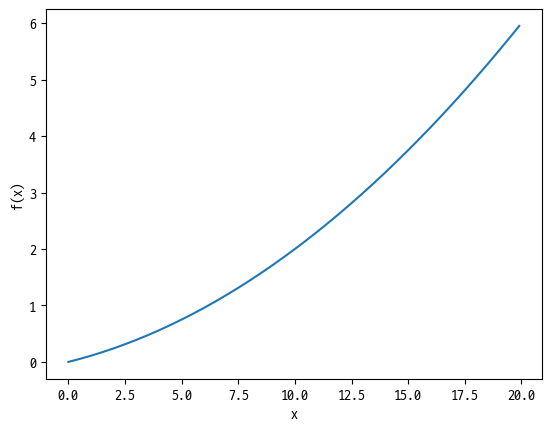

In [17]:
# numerical differential example
def function_1(x):
    return 0.01 * x ** 2  + 0.1 * x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y);

In [21]:
print('bad_numerical_diff')
print(bad_numerical_diff(function_1, 5))
print(bad_numerical_diff(function_1, 10))
print()

print('good_numerical_diff')
print(good_numerical_diff(function_1, 5))
print(good_numerical_diff(function_1, 10))

bad_numerical_diff
0.0
0.0

good_numerical_diff
0.1999999999990898
0.2999999999986347


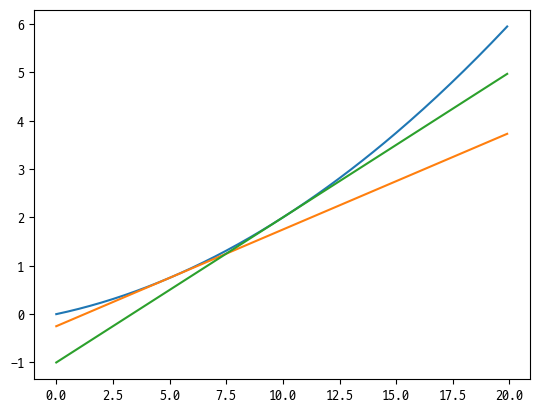

In [27]:
def tangent_line(f, x):
    d = good_numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

tf_5 = tangent_line(function_1, 5)
tf_10 = tangent_line(function_1, 10)
y2 = tf_5(x)
y3 = tf_10(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3);